In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [4]:
df = pd.read_csv("train_v.csv")

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [9]:
mode_outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [10]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [11]:
mode_outlet_size.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Outlet_Size to Outlet_Size
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grocery Store      1 non-null      object
 1   Supermarket Type1  1 non-null      object
 2   Supermarket Type2  1 non-null      object
 3   Supermarket Type3  1 non-null      object
dtypes: object(4)
memory usage: 40.0+ bytes


In [12]:
missing_values = df['Outlet_Size'].isnull()

In [13]:
missing_values.value_counts()

Outlet_Size
False    6113
True     2410
Name: count, dtype: int64

In [14]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet_size[x])

In [16]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode(), inplace=True)

In [17]:
missing_values.value_counts()

Outlet_Size
False    6113
True     2410
Name: count, dtype: int64

In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
#A few plot for check data
sns.set()

<Figure size 600x600 with 0 Axes>

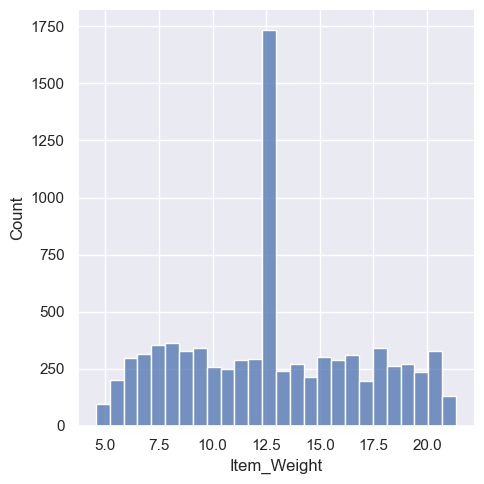

In [21]:
plt.figure(figsize=(6, 6))
sns.displot(df['Item_Weight'])
plt.show()


<Figure size 600x600 with 0 Axes>

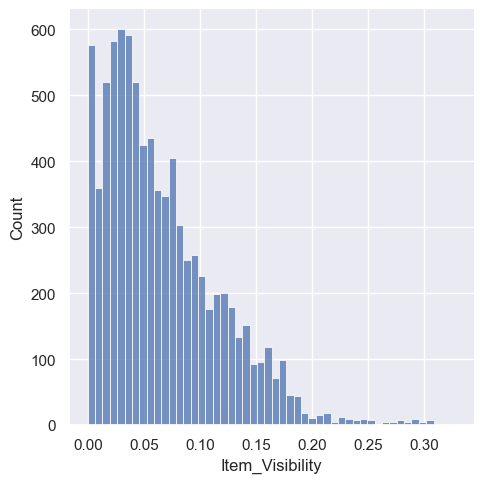

In [22]:
plt.figure(figsize=(6, 6))
sns.displot(df['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

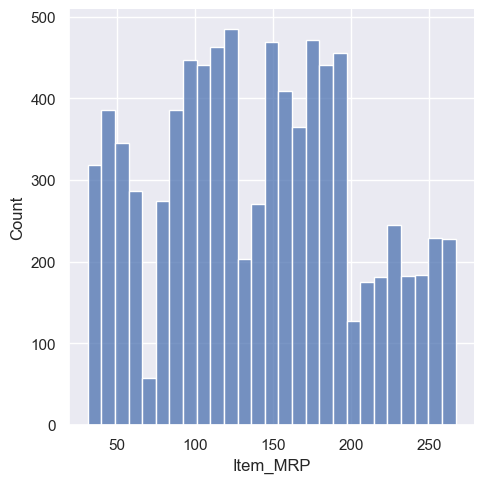

In [23]:
plt.figure(figsize=(6, 6))
sns.displot(df['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

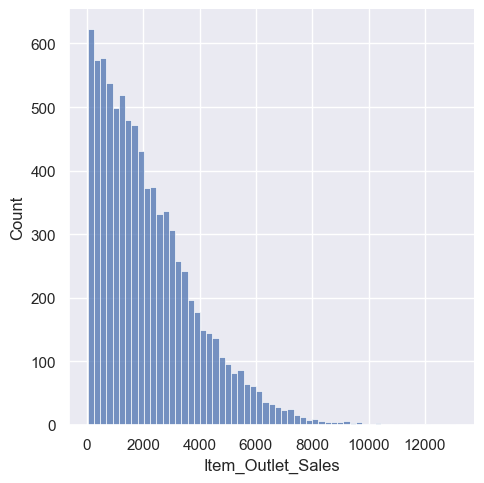

In [24]:
plt.figure(figsize=(6, 6))
sns.displot(df['Item_Outlet_Sales'])
plt.show()

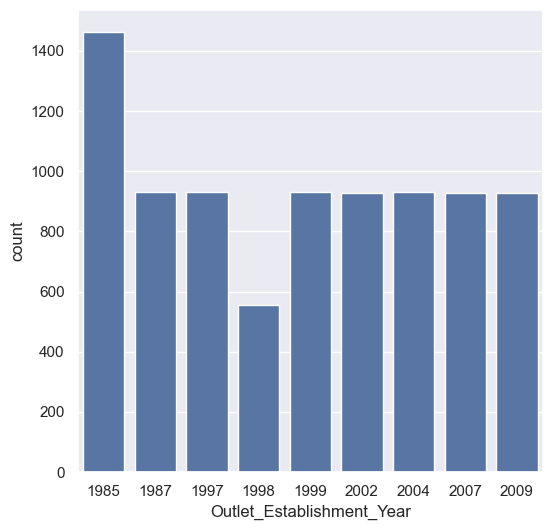

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

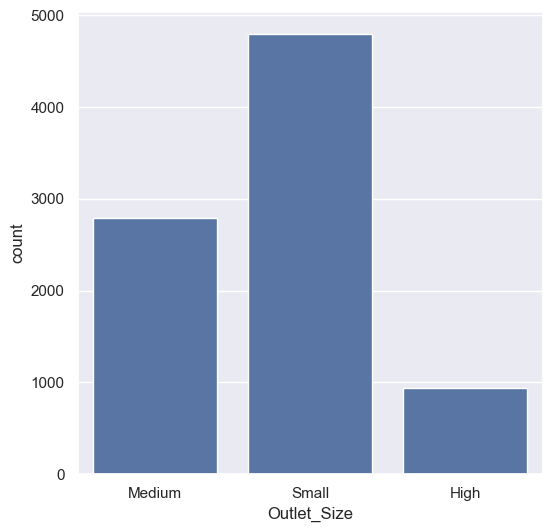

In [26]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

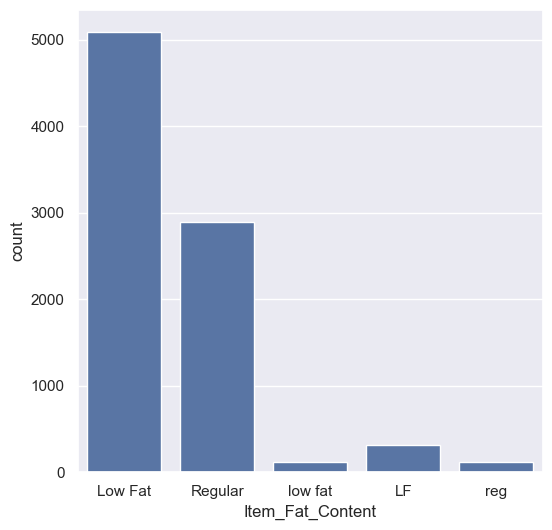

In [27]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

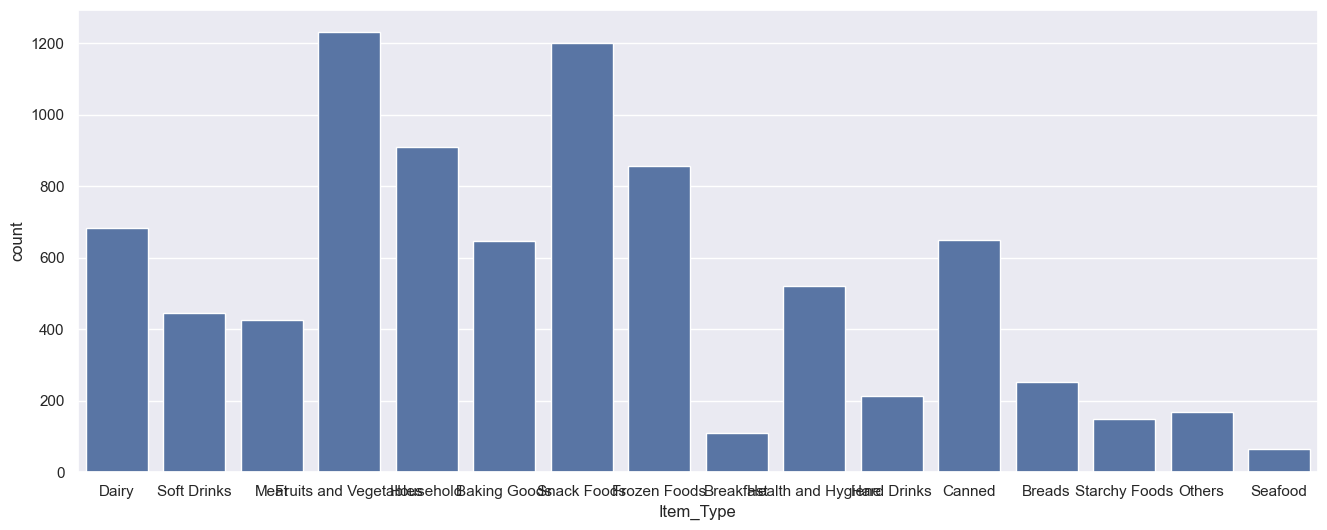

In [28]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Item_Type', data=df)
plt.show()

In [29]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [30]:
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [31]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [32]:
df['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [33]:
df['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

Encoding categorycal features

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
encoder = LabelEncoder()

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type']:
    df[column] = encoder.fit_transform(df[column])


In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [38]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [39]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=2)

In [40]:
regressor = XGBRegressor()

In [41]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Metrics

In [42]:
#Prediction on training data
train_data_pred= regressor.predict(X_train)

In [46]:
r2_train = metrics.r2_score(y_train, train_data_pred)
mse_train = metrics.mean_squared_error(y_train, train_data_pred)
mae_train = metrics.mean_absolute_error(y_train, train_data_pred)
print(f"MSE (Train): {mse_train}")
print(f"MAE (Train): {mae_train}")
print(f"R² (Train): {r2_train}")

MSE (Train): 320885.61963373853
MAE (Train): 411.2251981687272
R² (Train): 0.8867668186007875


In [49]:
test_data_pred= regressor.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_pred)
mae_test = metrics.mean_absolute_error(y_test, test_data_pred)
mse_test = metrics.mean_squared_error(y_test, test_data_pred)
print(f"MSE (Train): {mse_test}")
print(f"MAE (Test): {mae_test}")
print('R²: ', r2_test)



MSE (Train): 1471503.641599133
MAE (Test): 849.4839235184828
R²:  0.5241073153036377


Cross Validation scores

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()


In [57]:
scores = cross_val_score(model_LR, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE: {mean_mse:.2f}")
print(f"Standard Deviation of MSE: {std_mse:.2f}")

Mean MSE: 1423885.65
Standard Deviation of MSE: 79603.67
